In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pandapower as pp
import pandapower.networks
import pandapower.contingency
import pandapower.control
import pandapower.timeseries
import pandapower.plotting
from pandapower.pypower.makeYbus import makeYbus
from pandapower.pypower.idx_brch import T_BUS, F_BUS, RATE_A, BR_STATUS
from pandapower.pypower.idx_bus import BUS_I, BUS_TYPE, VMIN, VMAX, BASE_KV
from pandapower.pypower.makeYbus import branch_vectors
from GridDataGen.utils.io import load_net_from_pglib


/Users/albanpuech/grid_data_synthetic/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
net = pp.networks.case300()


In [5]:
net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,None,256,1.0507,0.0,1.0,True,2399.01,0.0,10.0,0.0


In [6]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,i0_percent,shift_degree,tap_side,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service,max_loading_percent
0,None,None,30,265,9900.0,115.0,115.0,4.592576,0.594,0.0,0.000000,0.0,hv,0.0,NaN,NaN,0.82,NaN,1.0,False,1,1.0,True,100.0
1,None,None,265,270,9900.0,115.0,6.6,4331.253785,241.461,0.0,0.000000,0.0,hv,0.0,NaN,NaN,3.32,NaN,-1.0,False,1,1.0,True,100.0
2,None,None,265,272,9900.0,115.0,6.6,6434.911493,358.776,0.0,0.000000,0.0,hv,0.0,NaN,NaN,2.04,NaN,-1.0,False,1,1.0,True,100.0
3,None,None,269,291,9900.0,115.0,13.8,3714.400683,156.222,0.0,0.000000,0.0,hv,0.0,NaN,NaN,4.35,NaN,1.0,False,1,1.0,True,100.0
4,None,None,269,292,9900.0,115.0,13.8,3714.400683,156.222,0.0,0.000000,0.0,hv,0.0,NaN,NaN,6.09,NaN,-1.0,False,1,1.0,True,100.0
5,None,None,269,293,9900.0,115.0,13.8,3769.891558,158.598,0.0,0.000000,0.0,hv,0.0,NaN,NaN,4.35,NaN,1.0,False,1,1.0,True,100.0
6,None,None,269,294,9900.0,115.0,13.8,1504.800000,0.000,0.0,0.000000,0.0,hv,0.0,NaN,NaN,4.35,NaN,1.0,False,1,1.0,True,100.0
7,None,None,269,295,9900.0,115.0,13.8,7920.000000,0.000,0.0,0.000000,0.0,hv,0.0,NaN,NaN,4.35,NaN,1.0,False,1,1.0,True,100.0
8,None,None,273,274,9900.0,6.6,0.6,28214.422476,4392.036,0.0,0.000000,0.0,hv,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True,100.0
9,None,None,266,276,9900.0,6.6,0.6,32273.429060,5024.052,0.0,0.000000,0.0,hv,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True,100.0


In [4]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,max_loading_percent
0,None,None,265,269,1.0,0.105800,0.460230,0.000000,0.0,49.702328,1.0,1,ol,True,100.0
1,None,None,270,271,1.0,0.024211,0.107445,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
2,None,None,270,267,1.0,0.048430,0.214890,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
3,None,None,270,267,1.0,0.048430,0.214890,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
4,None,None,272,266,1.0,0.033201,0.188554,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
5,None,None,272,266,1.0,0.033201,0.188554,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
6,None,None,266,273,1.0,0.023392,0.030605,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
7,None,None,273,275,1.0,0.482122,0.415031,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
8,None,None,271,267,1.0,0.024306,0.107445,0.000000,0.0,866.025404,1.0,1,ol,True,100.0
9,None,None,267,290,1.0,0.032139,0.027669,0.000000,0.0,866.025404,1.0,1,ol,True,100.0


In [2]:
net = pp.networks.case24_ieee_rts()
pp.runopp(net)
ppc = net._ppc
to_bus = np.real(ppc["branch"][:, T_BUS])
from_bus = np.real(ppc["branch"][:, F_BUS])
Ytt, Yff, Yft, Ytf = branch_vectors(ppc["branch"], ppc["branch"].shape[0])
Ytt_r = np.real(Ytt)
Ytt_i = np.imag(Ytt)
Yff_r = np.real(Yff)
Yff_i = np.imag(Yff)
Yft_r = np.real(Yft)
Yft_i = np.imag(Yft)
Ytf_r = np.real(Ytf)
Ytf_i = np.imag(Ytf)

rate_a = np.real(ppc["branch"][:, RATE_A])
edge_params = pd.DataFrame(
    np.column_stack(
        (
            from_bus,
            to_bus,
            Yff_r,
            Yff_i,
            Yft_r,
            Yft_i,
            Ytf_r,
            Ytf_i,
            Ytt_r,
            Ytt_i,
            rate_a,
        )
    ),
    columns=[
        "from_bus",
        "to_bus",
        "Yff_r",
        "Yff_i",
        "Yft_r",
        "Yft_i",
        "Ytf_r",
        "Ytf_i",
        "Ytt_r",
        "Ytt_i",
        "rate_a",
    ],
)
# comvert everything to float32
edge_params = edge_params.astype(np.float32)


In [3]:
net = pp.networks.case24_ieee_rts()
pp.rundcpp(net)
ppc = net._ppc
to_bus = np.real(ppc["branch"][:, T_BUS])
from_bus = np.real(ppc["branch"][:, F_BUS])
Ytt, Yff, Yft, Ytf = branch_vectors(ppc["branch"], ppc["branch"].shape[0])
Ytt_r = np.real(Ytt)
Ytt_i = np.imag(Ytt)
Yff_r = np.real(Yff)
Yff_i = np.imag(Yff)
Yft_r = np.real(Yft)
Yft_i = np.imag(Yft)
Ytf_r = np.real(Ytf)
Ytf_i = np.imag(Ytf)

rate_a = np.real(ppc["branch"][:, RATE_A])
edge_params2 = pd.DataFrame(
    np.column_stack(
        (
            from_bus,
            to_bus,
            Yff_r,
            Yff_i,
            Yft_r,
            Yft_i,
            Ytf_r,
            Ytf_i,
            Ytt_r,
            Ytt_i,
            rate_a,
        )
    ),
    columns=[
        "from_bus",
        "to_bus",
        "Yff_r",
        "Yff_i",
        "Yft_r",
        "Yft_i",
        "Ytf_r",
        "Ytf_i",
        "Ytt_r",
        "Ytt_i",
        "rate_a",
    ],
)
# comvert everything to float32
edge_params2 = edge_params2.astype(np.float32)


In [5]:
net = pp.networks.case300()
net.load.p_mw *=0.5629379563456729

pp.runopp(net)
# run dc pf
pp.rundcpp(net)
net.bus['vm_pu_dc'] = net.res_bus['vm_pu']
net.bus['va_degree_dc'] = net.res_bus['va_degree']
# run ac pf
pp.runpp(net)





gen vm_pu > bus max_vm_pu for gens [18 27 28]. Setting bus limit for these gens.
gen vm_pu < bus min_vm_pu for gens [22]. Setting bus limit for these gens.


OPFNotConverged: Optimal Power Flow did not converge!

In [6]:
net = load_net_from_pglib("case300_ieee")
for multiplier in np.linspace(0.2, 1, 100):
    print(multiplier)
    try:
        net.load.p_mw *=multiplier
        pp.runopp(net)
        # run dc pf
        pp.rundcpp(net)
        net.bus['vm_pu_dc'] = net.res_bus['vm_pu']
        net.bus['va_degree_dc'] = net.res_bus['va_degree']
        # run ac pf
        pp.runpp(net)
        print("SUCCESS")
    except Exception as e:
        print(e)





/Users/albanpuech/grid_data_synthetic/venv/lib/python3.9/site-packages/pandapower/create.py:5049: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  net[table] = pd.concat([net[table], dd[dd.columns[~dd.isnull().all()]]], sort=False)
There are 13 branches which are considered as trafos - due to ratio unequal 0 or 1 - but connect same voltage levels.


0.2
Power Flow nr did not converge after 10 iterations!
0.2080808080808081
Optimal Power Flow did not converge!
0.21616161616161617
Optimal Power Flow did not converge!
0.22424242424242424
Optimal Power Flow did not converge!
0.23232323232323232
Optimal Power Flow did not converge!
0.2404040404040404
Optimal Power Flow did not converge!
0.2484848484848485
Optimal Power Flow did not converge!
0.25656565656565655
Optimal Power Flow did not converge!
0.2646464646464647
Optimal Power Flow did not converge!
0.2727272727272727
Optimal Power Flow did not converge!
0.28080808080808084
Optimal Power Flow did not converge!
0.2888888888888889
Optimal Power Flow did not converge!
0.296969696969697
Optimal Power Flow did not converge!
0.30505050505050507
Optimal Power Flow did not converge!
0.31313131313131315
Optimal Power Flow did not converge!
0.3212121212121212
Optimal Power Flow did not converge!
0.3292929292929293
Optimal Power Flow did not converge!
0.3373737373737374
Optimal Power Flow did 

KeyboardInterrupt: 

In [24]:
# net2 = pp.networks.case24_ieee_rts()
# pp.runopp(net2)
# # run ac pf
# pp.runpp(net2)





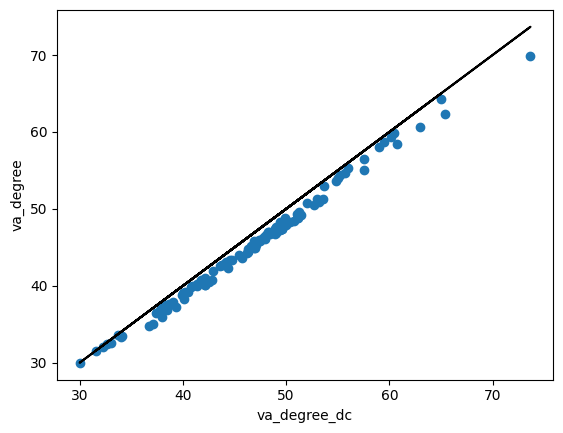

In [45]:
# plot va_degree_dc against va_degree
plt.plot(net.bus['va_degree_dc'], net.res_bus['va_degree'], 'o')
plt.xlabel('va_degree_dc')
plt.ylabel('va_degree')
# plot y = x
plt.plot(net.bus['va_degree_dc'], net.bus['va_degree_dc'], 'k-')
plt.show()



In [25]:
# compare res_bus["vm_pu"] and res_bus["va_degree"] are the same in net and net2
print(np.allclose(net.res_bus["vm_pu"], net2.res_bus["vm_pu"]))
print(np.allclose(net.res_bus["va_degree"], net2.res_bus["va_degree"]))





True
True


In [18]:
net.bus['vm_pu_dc']

0     1.035000
1     1.035000
2     0.951676
3     0.976219
4     1.006936
5     0.993775
6     1.025000
7     0.978985
8     0.962798
9     1.004967
10    0.995926
11    1.010374
12    1.020000
13    0.980000
14    1.014000
15    1.017000
16    1.038549
17    1.050000
18    1.023248
19    1.038491
20    1.050000
21    1.050000
22    1.050000
23    0.985589
Name: vm_pu_dc, dtype: float64

In [15]:
(edge_params- edge_params2).max()

from_bus    0.0
to_bus      0.0
Yff_r       0.0
Yff_i       0.0
Yft_r       0.0
Yft_i       0.0
Ytf_r       0.0
Ytf_i       0.0
Ytt_r       0.0
Ytt_i       0.0
rate_a      0.0
dtype: float32

In [12]:
from pandapower.pypower.idx_brch import *
from pandapower.pypower.idx_bus import BASE_KV, GS, BS

In [4]:
ppc = net._ppc
Ybus, Yf, Yt = makeYbus(net.sn_mva, ppc["bus"], ppc["branch"])
branch = ppc["branch"]
bus = ppc["bus"]
nl = branch.shape[0]
stat = branch[:, BR_STATUS]  ## ones at in-service branches
Ysf = stat / (branch[:, BR_R] + 1j * branch[:, BR_X])  ## series admittance
if any(branch[:, BR_R_ASYM]) or any(branch[:, BR_X_ASYM]):
    Yst = stat / ((branch[:, BR_R] + branch[:, BR_R_ASYM]) + 1j * (
                branch[:, BR_X] + branch[:, BR_X_ASYM]))  ## series admittance
else:
    Yst = Ysf
Bc = stat * branch[:, BR_B]  ## line charging susceptance
tap = np.ones(nl)  ## default tap ratio = 1
i = np.nonzero(np.real(branch[:, TAP]))  ## indices of non-zero tap ratios
tap[i] = np.real(branch[i, TAP])  ## assign non-zero tap ratios
tap = tap * np.exp(1j * np.pi / 180 * branch[:, SHIFT])  ## add phase shifters

Ytt = Yst + 1j * Bc / 2
Yff = (Ysf + 1j * Bc / 2) / (tap * np.conj(tap))
Yft = - Ysf / np.conj(tap)
Ytf = - Yst / tap





In [6]:
Yff.shape

(38,)

In [7]:
branch.shape

(38, 23)

In [8]:
branch[:, F_BUS], branch[:, T_BUS]

(array([ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,
         4.+0.j,  5.+0.j,  6.+0.j,  7.+0.j,  7.+0.j, 10.+0.j, 10.+0.j,
        11.+0.j, 11.+0.j, 12.+0.j, 13.+0.j, 14.+0.j, 14.+0.j, 14.+0.j,
        14.+0.j, 15.+0.j, 15.+0.j, 16.+0.j, 16.+0.j, 17.+0.j, 17.+0.j,
        18.+0.j, 18.+0.j, 19.+0.j, 19.+0.j, 20.+0.j, 23.+0.j, 10.+0.j,
        11.+0.j, 10.+0.j, 11.+0.j]),
 array([ 1.+0.j,  2.+0.j,  4.+0.j,  3.+0.j,  5.+0.j,  8.+0.j,  8.+0.j,
         9.+0.j,  9.+0.j,  7.+0.j,  8.+0.j,  9.+0.j, 12.+0.j, 13.+0.j,
        12.+0.j, 22.+0.j, 22.+0.j, 15.+0.j, 15.+0.j, 20.+0.j, 20.+0.j,
        23.+0.j, 16.+0.j, 18.+0.j, 17.+0.j, 21.+0.j, 20.+0.j, 20.+0.j,
        19.+0.j, 19.+0.j, 22.+0.j, 22.+0.j, 21.+0.j,  2.+0.j,  8.+0.j,
         8.+0.j,  9.+0.j,  9.+0.j]))

In [9]:
branch[12, RATE_A]

(499.9999999999989+0j)

In [10]:
bus[:, BASE_KV]

array([138., 138., 138., 138., 138., 138., 138., 138., 138., 138., 230.,
       230., 230., 230., 230., 230., 230., 230., 230., 230., 230., 230.,
       230., 230.])

In [12]:
ppc = net._ppc
Ybus, Yf, Yt = makeYbus(net.sn_mva, ppc["bus"], ppc["branch"])
branch = ppc["branch"]
bus = ppc["bus"]
V = net.res_bus.vm_pu * np.exp(1j * net.res_bus.va_degree * np.pi / 180)



In [35]:
If_pu = np.abs(Yf * V)
# Get base voltage in kV for each branch from the 'from bus'
from_bus_indices = branch[:, F_BUS].astype(int)  # column 0 = F_BUS
Vf_base_kV = bus[from_bus_indices, BASE_KV]  # column 9 = BASE_KV in ppc["bus"]

# Convert to kA
If_kA = If_pu * net.sn_mva / (np.sqrt(3) * Vf_base_kV)

limitf = np.real(branch[:, RATE_A]) / (Vf_base_kV * np.sqrt(3))

loadingf = If_kA / limitf


It_pu = np.abs(Yt * V)
# Get base voltage in kV for each branch from the 'to bus'
to_bus_indices = branch[:, T_BUS].astype(int)  # column 0 = F_BUS
Vt_base_kV = bus[to_bus_indices, BASE_KV]  # column 9 = BASE_KV in ppc["bus"]

# Convert to kA
It_kA = It_pu * net.sn_mva / (np.sqrt(3) * Vt_base_kV)

limitt = np.real(branch[:, RATE_A]) / (Vt_base_kV * np.sqrt(3))

loadingt = It_kA / limitt

loading = np.maximum(loadingf, loadingt)
loading


/var/folders/ld/19f7b26x5s9771w9ggsv_vxh0000gn/T/ipykernel_50585/2671100473.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  from_bus_indices = branch[:, F_BUS].astype(int)  # column 0 = F_BUS
/var/folders/ld/19f7b26x5s9771w9ggsv_vxh0000gn/T/ipykernel_50585/2671100473.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  to_bus_indices = branch[:, T_BUS].astype(int)  # column 0 = F_BUS


array([0.15216481, 0.17736755, 0.36857521, 0.29951775, 0.29300657,
       0.13905871, 0.1912477 , 0.05838724, 0.87130555, 0.55230437,
       0.29041141, 0.23018208, 0.20187469, 0.3351663 , 0.14719553,
       0.43435485, 0.40556449, 0.70878046, 0.19534525, 0.42150335,
       0.42150335, 0.40252632, 0.61090204, 0.16972542, 0.34543816,
       0.27100865, 0.11069131, 0.11069131, 0.09318046, 0.09318046,
       0.2151226 , 0.2151226 , 0.30506027, 0.51825263, 0.28781469,
       0.3193541 , 0.388757  , 0.42821925])

In [37]:
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,200.115237,29.973369,-199.126841,6.081587,0.988396,36.054956,0.505215,0.867285,1.005388,3.720878,0.961016,-6.546933,51.825263
1,110.511247,29.012947,-110.206406,-17.892868,0.304841,11.120079,0.280574,0.481652,1.022220,-2.691433,0.969804,-8.179605,28.781469
2,124.137347,19.193177,-123.762034,-5.502437,0.375312,13.690741,0.311320,0.534432,1.012831,-1.936242,0.969804,-8.179605,31.935410
3,155.831617,-1.725817,-155.275452,22.013777,0.556166,20.287960,0.382692,0.650577,1.022220,-2.691433,1.008523,-10.126101,38.875700
4,169.735139,-10.885405,-169.060331,35.501225,0.674808,24.615820,0.421539,0.716616,1.012831,-1.936242,1.008523,-10.126101,42.821925


In [27]:
limit

array([0.73214708, 0.73214708, 0.73214708, 0.73214708, 0.73214708,
       0.73214708, 0.73214708, 0.73214708, 0.73214708, 0.73214708,
       0.73214708, 0.73214708, 1.25510928, 1.25510928, 1.25510928,
       1.25510928, 1.25510928, 1.25510928, 1.25510928, 1.25510928,
       1.25510928, 1.25510928, 1.25510928, 1.25510928, 1.25510928,
       1.25510928, 1.25510928, 1.25510928, 1.25510928, 1.25510928,
       1.25510928, 1.25510928, 1.25510928, 1.67347904, 1.67347904,
       1.67347904, 1.67347904, 1.67347904])

In [14]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,i0_percent,shift_degree,tap_side,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service,max_loading_percent
0,None,None,23,2,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,3.0,NaN,1,False,1,1.0,True,100.0
1,None,None,10,8,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,3.0,NaN,1,False,1,1.0,True,100.0
2,None,None,11,8,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,3.0,NaN,1,False,1,1.0,True,100.0
3,None,None,10,9,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,2.0,NaN,1,False,1,1.0,True,100.0
4,None,None,11,9,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,2.0,NaN,1,False,1,1.0,True,100.0


In [33]:
bus[:, BASE_KV]

array([138., 138., 138., 138., 138., 138., 138., 138., 138., 138., 230.,
       230., 230., 230., 230., 230., 230., 230., 230., 230., 230., 230.,
       230., 230.])

In [34]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,i0_percent,shift_degree,tap_side,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service,max_loading_percent
0,None,None,23,2,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,3.0,NaN,1,False,1,1.0,True,100.0
1,None,None,10,8,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,3.0,NaN,1,False,1,1.0,True,100.0
2,None,None,11,8,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,3.0,NaN,1,False,1,1.0,True,100.0
3,None,None,10,9,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,2.0,NaN,1,False,1,1.0,True,100.0
4,None,None,11,9,400.0,230.0,138.0,33.572608,0.92,0.0,0.0,0.0,hv,0,NaN,NaN,2.0,NaN,1,False,1,1.0,True,100.0


In [15]:
net.res_line["from_bus"] = net.line.from_bus
net.res_line["to_bus"] = net.line.to_bus

net.res_trafo["from_bus"] = net.trafo.
net.res_trafo["to_bus"] = net.trafo.to_bus


AttributeError: 'DataFrame' object has no attribute 'from_bus'

In [20]:
from scipy.sparse import csr_matrix

In [21]:
for line in net.line.index:
    from_bus = net.line.loc[line, "from_bus"]
    to_bus = net.line.loc[line, "to_bus"]
    # get the index of the line in the branch array
    line_index = np.where((branch[:, F_BUS] == from_bus) & (branch[:, T_BUS] == to_bus))[0][0]
    assert np.isclose(net.res_line.loc[line, "loading_percent"]/100, loading[line_index])
    I_from_kA = net.res_line.loc[line, "i_from_ka"]
    I_to_kA = net.res_line.loc[line, "i_to_ka"]
    assert np.isclose(I_from_kA, If_kA[line_index])
    assert np.isclose(I_to_kA, It_kA[line_index])

for trafo in net.trafo.index:
    from_bus = net.trafo.loc[trafo, "hv_bus"]
    to_bus = net.trafo.loc[trafo, "lv_bus"]
    # get the index of the line in the branch array
    line_index = np.where((branch[:, F_BUS] == from_bus) & (branch[:, T_BUS] == to_bus))[0][0]
    I_from_kA = net.res_trafo.loc[trafo, "i_hv_ka"]
    I_to_kA = net.res_trafo.loc[trafo, "i_lv_ka"]
    assert np.isclose(I_from_kA, If_kA[line_index])
    assert np.isclose(I_to_kA, It_kA[line_index])









In [22]:
edge_index = np.real(branch[:, [F_BUS, T_BUS]]).astype(int)
edge_attr = np.stack([Yff, Yft, Ytf, Ytt], axis=1)

# shuffle edge_index and edge_attr by the same permutation
perm = np.random.permutation(edge_index.shape[0])
edge_index = edge_index[perm]
edge_attr = edge_attr[perm]




In [23]:

nb = net.bus.shape[0]
f = edge_index[:, 0]
t = edge_index[:, 1]
Yff2 = edge_attr[:, 0]
Yft2 = edge_attr[:, 1]
Ytf2 = edge_attr[:, 2]
Ytt2 = edge_attr[:, 3]
Vf_base_kV2 = bus[f, BASE_KV]
Vt_base_kV2 = bus[t, BASE_KV]
i = np.hstack([range(nl), range(nl)])

Yf2 = csr_matrix((np.hstack([Yff2, Yft2]), (i, np.hstack([f, t]))), (nl, nb))
If_pu2 = Yf2 * V
If_kA2 = np.abs(If_pu2) * net.sn_mva / (np.sqrt(3) * Vf_base_kV2)
If_kA2

Yt2 = csr_matrix((np.hstack([Ytf2, Ytt2]), (i, np.hstack([f, t]))), (nl, nb))
It_pu2 = Yt2 * V
It_kA2 = np.abs(It_pu2) * net.sn_mva / (np.sqrt(3) * Vt_base_kV2)
It_kA2

array([0.71661594, 0.542604  , 0.34014547, 0.26985127, 0.52893847,
       0.26837704, 0.13892969, 0.2399367 , 0.13892969, 0.5070165 ,
       0.5344324 , 0.21262387, 0.21302395, 0.50521451, 0.16158048,
       0.2145239 , 0.12985913, 0.40436803, 0.76674882, 0.52893847,
       0.65057669, 0.21929105, 0.09488451, 0.38288397, 0.88959693,
       0.60135148, 0.48165186, 0.03577506, 0.11348127, 0.25337479,
       0.11348127, 0.86728492, 0.18276063, 0.10265819, 0.14002145,
       0.41493712, 0.26837704, 0.43356264])

In [24]:
np.allclose(If_kA2.sum(), If_kA.sum())

True

In [353]:
np.allclose(It_kA2.sum(), It_kA.sum())

True

In [25]:
limit = np.real(branch[:, RATE_A]) / (V_base_kV * np.sqrt(3))
limit

NameError: name 'V_base_kV' is not defined

In [26]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent,from_bus,to_bus
0,10.243155,-25.183488,-10.240505,-22.860567,0.002650,-48.044055,0.111407,0.102658,0.111407,1.020959,-7.396268,1.020856,-7.476185,15.216481,0,1
1,0.579320,25.896840,-0.142316,-29.828954,0.437003,-3.932114,0.106147,0.129859,0.129859,1.020959,-7.396268,0.961016,-6.546933,17.736755,0,2
2,65.177523,7.454962,-64.273424,-6.291883,0.904099,1.163079,0.268827,0.269851,0.269851,1.020959,-7.396268,1.001240,-10.378898,36.857521,0,4
3,45.042328,25.523972,-44.169027,-25.563603,0.873300,-0.039631,0.212171,0.219291,0.219291,1.020856,-7.476185,0.973629,-10.250622,29.951775,1,3
4,52.198175,1.150170,-50.891684,-1.375571,1.306491,-0.225400,0.213972,0.214524,0.214524,1.020856,-7.476185,0.992865,-13.041819,29.300657,1,5
5,19.269160,-13.252633,-19.099166,10.908270,0.169993,-2.344363,0.101811,0.094885,0.101811,0.961016,-6.546933,0.969804,-8.179605,13.905871,2,8
6,-29.830972,10.563603,30.122561,-12.088631,0.291589,-1.525028,0.135984,0.140021,0.140021,0.973629,-10.250622,0.969804,-8.179605,19.124770,3,8
7,-6.726575,-7.708117,6.746505,5.371879,0.019930,-2.336238,0.042748,0.035775,0.042748,1.001240,-10.378898,1.008523,-10.126101,5.838724,4,9
8,-85.108315,-125.202430,86.131931,-116.598668,1.023617,-241.801097,0.637924,0.601351,0.637924,0.992865,-13.041819,1.008523,-10.126101,87.130555,5,9
9,89.823237,34.996609,-88.345936,-30.905577,1.477300,4.091032,0.401992,0.404368,0.404368,1.003275,-10.340688,0.968366,-13.258477,55.230437,6,7
